In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('https://github.com/Iddo-Smith/regression-apples-predict-api-template/raw/main/edsa-apple-prices-challenge/df%20-%20train_set.csv')
data_T = pd.read_csv('https://github.com/Iddo-Smith/regression-apples-predict-api-template/raw/main/edsa-apple-prices-challenge/df%20-%20test_set.csv',index_col='Index')

In [3]:
sample = pd.read_csv('https://github.com/Iddo-Smith/regression-apples-predict-api-template/raw/main/edsa-apple-prices-challenge/sample_submission.csv')
sample.head()

,Index,Price
0,1,13.94
1,2,1.30


In [4]:
data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
data_T.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Index,,,,,,,,,,,,
1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


# EDA

In [6]:
data.shape

(64376, 13)

In [7]:
def dataDetails(df):
    res = pd.DataFrame()
    res["Columns"] = list(df.columns)
    res["Missing_Values"] = list(df.isna().sum())
    res["Data_Type"] = list(df.dtypes)
    res["Unique_Values"] = [df[x].nunique() for x in df.columns]
    
    return res
details = dataDetails(data)
details

,Columns,Missing_Values,Data_Type,Unique_Values
0,Province,0,object,22
1,Container,0,object,153
2,Size_Grade,0,object,47
3,Weight_Kg,0,float64,50
4,Commodities,0,object,270
5,Date,0,object,147
6,Low_Price,0,float64,320
7,High_Price,0,float64,277
8,Sales_Total,0,float64,18356
9,Total_Qty_Sold,0,int64,3766


In [8]:
data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [9]:
Categorical_Train = data.select_dtypes(include = ['object']) # selects all categorical variables from the train data set
Categorical_Test = data_T.select_dtypes(include = ['object'])
Categorical_Train.head()

,Province,Container,Size_Grade,Commodities,Date
0,CAPE,EC120,1L,APPLE GRANNY SMITH,2020-03-10
1,CAPE,M4183,1L,APPLE GOLDEN DELICIOUS,2020-09-09
2,GAUTENG,AT200,1L,AVOCADO PINKERTON,2020-05-05
3,TRANSVAAL,BJ090,1L,TOMATOES-LONG LIFE,2020-01-20
4,WESTERN FREESTATE,PP100,1R,POTATO SIFRA (WASHED),2020-07-14


In [10]:
le = LabelEncoder()
encoded_categorical_Train = Categorical_Train.apply(lambda x: le.fit_transform(x))
encoded_categorical_Test = Categorical_Test.apply(lambda x: le.fit_transform(x))
encoded_categorical_Train.head()

,Province,Container,Size_Grade,Commodities,Date
0,0,63,7,11,41
1,0,113,7,10,138
2,3,27,7,36,69
3,17,44,7,266,16
4,21,141,9,237,103


In [11]:
Numeric_Train = data._get_numeric_data()# selects all numerical columns from the train_rd data frame
Numeric_Test = data_T._get_numeric_data()
Numeric_Train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,12.0,108.0,112.0,3236.0,29,348.0,0,9.30
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
2,20.0,70.0,80.0,4860.0,66,1320.0,50,3.68
3,9.0,60.0,60.0,600.0,10,90.0,0,6.67
4,10.0,40.0,45.0,41530.0,927,9270.0,393,4.48


In [12]:
train_encoded = pd.concat([encoded_categorical_Train, Numeric_Train], axis = 1) #combining the numerical data with the encoded categorical data
test_encoded = pd.concat([encoded_categorical_Test, Numeric_Test], axis = 1) #combining the numerical data with the encoded categorical data

In [13]:
train_encoded.head()

,Province,Container,Size_Grade,Commodities,Date,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,0,63,7,11,41,12.0,108.0,112.0,3236.0,29,348.0,0,9.30
1,0,113,7,10,138,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
2,3,27,7,36,69,20.0,70.0,80.0,4860.0,66,1320.0,50,3.68
3,17,44,7,266,16,9.0,60.0,60.0,600.0,10,90.0,0,6.67
4,21,141,9,237,103,10.0,40.0,45.0,41530.0,927,9270.0,393,4.48


<AxesSubplot:>

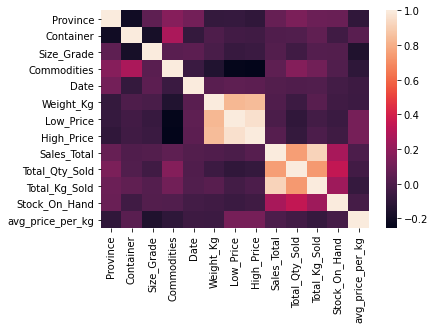

In [14]:
correlation = train_encoded.corr()
sns.heatmap(correlation)

In [15]:
train_encoded.drop(['Weight_Kg','Low_Price','High_Price'], axis = 1)

,Province,Container,Size_Grade,Commodities,Date,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,0,63,7,11,41,3236.0,29,348.0,0,9.30
1,0,113,7,10,138,51710.0,332,6075.6,822,8.51
2,3,27,7,36,69,4860.0,66,1320.0,50,3.68
3,17,44,7,266,16,600.0,10,90.0,0,6.67
4,21,141,9,237,103,41530.0,927,9270.0,393,4.48
...,...,...,...,...,...,...,...,...,...,...
64371,17,19,8,132,75,19695.0,281,2810.0,3583,7.01
64372,4,35,46,40,24,13560.0,72,1296.0,887,10.46
64373,17,151,8,266,129,6000.0,300,1050.0,900,5.71
64374,9,45,20,95,127,16730.0,277,2770.0,372,6.04


In [16]:
train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
train_encoded.fillna(999, inplace=True)

In [18]:
y = train_encoded['avg_price_per_kg']
X = train_encoded.drop(['avg_price_per_kg'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
regression = [LinearRegression(), Ridge(alpha=0.01), Lasso(alpha=0.01)]
name = ['Linear', 'Lasso', 'Ridge','Logistic']

base_result = []
models = {}

for name, reg in zip(name, regression):
    run_time = %timeit -q -o reg.fit(X_train, y_train)
    print('...predicting')
    y_pred = reg.predict(X_test)
    print('...evaluating')
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rss = mean_squared_error(y_test, y_pred)*len(data)
    r2 = r2_score(y_test, y_pred)
    models[name] = reg
    base_result.append([name, rmse,
                        mse, rss, r2,
                        run_time.best])
base_result = pd.DataFrame(base_result, columns =['Regressor', 'RSME',
                                                 'MSE', 'RSS', 'R2',
                                                 'Train Time'])
base_result.set_index('Regressor', inplace = True)

...predicting
...evaluating
...predicting
...evaluating
...predicting
...evaluating


In [21]:
base_result

,RSME,MSE,RSS,R2,Train Time
Regressor,,,,,
Linear,24.035674,577.713623,3.719089e+07,0.150933,0.016737
Lasso,24.035674,577.713623,3.719089e+07,0.150933,0.009334
Ridge,24.035696,577.714661,3.719096e+07,0.150931,0.097213


In [22]:
!pip install lightgbm

In [23]:
from lightgbm import LGBMRegressor

In [24]:
lgb = LGBMRegressor()
lgb.fit(X,y)

LGBMRegressor()

In [25]:
predict = lgb.predict(test_encoded)

In [26]:

data_T['avg_price_per_kg'] = predict 

In [27]:
data_T.reset_index(inplace=True)

In [28]:
data_T.columns

Index(['Index', 'Province', 'Container', 'Size_Grade', 'Weight_Kg',
       'Commodities', 'Date', 'Low_Price', 'High_Price', 'Sales_Total',
       'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [29]:
sub = data_T[['Index','avg_price_per_kg']]

In [30]:
sub.head()

,Index,avg_price_per_kg
0,1,21.450718
1,2,14.429404
2,3,13.808651
3,4,11.095807
4,5,10.431095


In [31]:
sub.to_csv('lgbm3.csv',index=False)

## linear regression model

In [32]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [33]:
y_pred = lr.predict(test_encoded)

In [34]:
data_T=data_T.reset_index()

In [35]:
data_T['avg_price_per_kg'] = y_pred 

In [36]:
sub = data_T[['Index','avg_price_per_kg']]

In [37]:
sub.head()

,Index,avg_price_per_kg
0,1,18.475222
1,2,24.779133
2,3,16.081679
3,4,19.089575
4,5,19.200024


In [38]:
sub.to_csv('linear.csv',index =False)